In [67]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [68]:
def price2ret(prices,retType='simple'):
    if retType == 'simple':
        ret = (prices/prices.shift(1))-1
    else:
        ret = np.log(prices/prices.shift(1))
    return ret

In [69]:
df_stk = pd.read_csv("/home/cody/workspace/research/td-research/data/SPY-historical.csv")
df_stk.head()

Unnamed: 0    open    high     low   close    volume  datetime
0           0  122.34  122.50  117.75  118.08  13972900  20010312
1           1  119.40  120.44  117.53  120.02  12888000  20010313
2           2  117.05  119.29  115.75  117.65  19883400  20010314
3           3  118.45  118.86  117.36  117.68  10370300  20010315
4           4  117.13  117.40  114.81  115.01  58514600  20010316

In [70]:
df_stk['Returns'] = price2ret(df_stk[['close']])
df_stk = df_stk.rename(columns={'datetime':'date'})
df_stk = df_stk.dropna()
df_stk.head()

Unnamed: 0    open    high     low   close    volume      date   Returns
1           1  119.40  120.44  117.53  120.02  12888000  20010313  0.016430
2           2  117.05  119.29  115.75  117.65  19883400  20010314 -0.019747
3           3  118.45  118.86  117.36  117.68  10370300  20010315  0.000255
4           4  117.13  117.40  114.81  115.01  58514600  20010316 -0.022689
5           5  115.76  117.69  114.82  117.35  10067800  20010319  0.020346

In [71]:
# df_stk['date'] = pd.to_datetime(df_stk['date'])
# df_stk['date'] = df_stk['date'].dt.strftime("%Y%m%d")
df_stk = df_stk.rename(columns={"datetime":"date"})
df_stk.date = df_stk.date.astype(str)
df_stk

Unnamed: 0    open    high       low   close     volume      date  \
1              1  119.40  120.44  117.5300  120.02   12888000  20010313   
2              2  117.05  119.29  115.7500  117.65   19883400  20010314   
3              3  118.45  118.86  117.3600  117.68   10370300  20010315   
4              4  117.13  117.40  114.8100  115.01   58514600  20010316   
5              5  115.76  117.69  114.8200  117.35   10067800  20010319   
...          ...     ...     ...       ...     ...        ...       ...   
5027        5027  380.46  384.76  372.6400  383.63  152039624  20210305   
5028        5028  384.66  387.68  381.4200  381.72  123149245  20210308   
5029        5029  385.85  389.91  381.7299  387.17  113633556  20210309   
5030        5030  389.69  391.40  388.1702  389.58  109899410  20210310   
5031        5031  392.23  395.65  391.7400  393.53   86245040  20210311   

       Returns  
1     0.016430  
2    -0.019747  
3     0.000255  
4    -0.022689  
5     0.020346  
...        ...  
5027  0.018397  
5028 -0.004979  
5029  0.014277  
5030  0.006225  
5031  0.010139  

[5031 rows x 8 columns]

In [72]:
# Data source https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
df_factors = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily_20201003.csv")
df_factors = df_factors.rename(columns={'Unnamed: 0':'date'})
df_factors['date'] = df_factors['date'].astype(str)
df_factors.head()

date  Mkt-RF   SMB   HML   RMW   CMA     RF
0  19630701   -0.67  0.00 -0.32 -0.01  0.15  0.012
1  19630702    0.79 -0.27  0.27 -0.07 -0.19  0.012
2  19630703    0.63 -0.17 -0.09  0.17 -0.33  0.012
3  19630705    0.40  0.08 -0.28  0.08 -0.33  0.012
4  19630708   -0.63  0.04 -0.18 -0.29  0.13  0.012

In [73]:
# Mkt/Mkt-RF -  the excess return on the market, value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of month t, good shares and price data at the beginning of t, and good return data for t minus the one-month Treasury bill rate (from Ibbotson Associates)
# SMB - Small Minus Big is the average return on the three small portfolios minus the average return on the three big portfolio
# HML - High Minus Low is the average return on the two value portfolios minus the average return on the two growth portfolios 
# RMW - The profitability factor is the difference between the returns of firms with robust (high) and weak (low) operating profitability
# CMA - The investment factor is the difference between the returns of firms that invest conservatively and firms that invest aggressively
# df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
df_factors['MKT'] = df_factors['MKT']/100
df_factors['SMB'] = df_factors['SMB']/100
df_factors['HML'] = df_factors['HML']/100
df_factors['RMW'] = df_factors['RMW']/100
df_factors['CMA'] = df_factors['CMA']/100
df_factors

date     MKT     SMB     HML     RMW     CMA     RF
0      19630701 -0.0067  0.0000 -0.0032 -0.0001  0.0015  0.012
1      19630702  0.0079 -0.0027  0.0027 -0.0007 -0.0019  0.012
2      19630703  0.0063 -0.0017 -0.0009  0.0017 -0.0033  0.012
3      19630705  0.0040  0.0008 -0.0028  0.0008 -0.0033  0.012
4      19630708 -0.0063  0.0004 -0.0018 -0.0029  0.0013  0.012
...         ...     ...     ...     ...     ...     ...    ...
14386  20200825  0.0036 -0.0001 -0.0063 -0.0045 -0.0069  0.000
14387  20200826  0.0101 -0.0166 -0.0174 -0.0009 -0.0084  0.000
14388  20200827  0.0018 -0.0003  0.0099  0.0055 -0.0046  0.000
14389  20200828  0.0070  0.0040 -0.0021  0.0016 -0.0009  0.000
14390  20200831 -0.0005 -0.0093 -0.0176 -0.0064 -0.0014  0.000

[14391 rows x 7 columns]

In [74]:
df_factors[df_factors['date'] == '19720705']

date     MKT     SMB     HML     RMW    CMA     RF
2245  19720705  0.0055 -0.0011 -0.0014  0.0027 -0.001  0.016

In [75]:
#df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
df_stock_factor = pd.merge(df_stk,df_factors,on='date',how='left')
df_stock_factor

Unnamed: 0    open    high       low   close     volume      date  \
0              1  119.40  120.44  117.5300  120.02   12888000  20010313   
1              2  117.05  119.29  115.7500  117.65   19883400  20010314   
2              3  118.45  118.86  117.3600  117.68   10370300  20010315   
3              4  117.13  117.40  114.8100  115.01   58514600  20010316   
4              5  115.76  117.69  114.8200  117.35   10067800  20010319   
...          ...     ...     ...       ...     ...        ...       ...   
5026        5027  380.46  384.76  372.6400  383.63  152039624  20210305   
5027        5028  384.66  387.68  381.4200  381.72  123149245  20210308   
5028        5029  385.85  389.91  381.7299  387.17  113633556  20210309   
5029        5030  389.69  391.40  388.1702  389.58  109899410  20210310   
5030        5031  392.23  395.65  391.7400  393.53   86245040  20210311   

       Returns     MKT     SMB     HML     RMW     CMA     RF  
0     0.016430  0.0161 -0.0074 -0.0138 -0.0048 -0.0198  0.019  
1    -0.019747 -0.0250  0.0071  0.0014 -0.0019  0.0015  0.019  
2     0.000255  0.0034 -0.0044  0.0049  0.0009  0.0022  0.019  
3    -0.022689 -0.0211 -0.0004  0.0123  0.0072  0.0015  0.019  
4     0.020346  0.0186 -0.0035 -0.0131 -0.0008 -0.0046  0.019  
...        ...     ...     ...     ...     ...     ...    ...  
5026  0.018397     NaN     NaN     NaN     NaN     NaN    NaN  
5027 -0.004979     NaN     NaN     NaN     NaN     NaN    NaN  
5028  0.014277     NaN     NaN     NaN     NaN     NaN    NaN  
5029  0.006225     NaN     NaN     NaN     NaN     NaN    NaN  
5030  0.010139     NaN     NaN     NaN     NaN     NaN    NaN  

[5031 rows x 14 columns]

In [76]:
df_stock_factor = df_stock_factor.dropna()

In [77]:
df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns
df_stock_factor

<ipython-input-77-a73ff8e31c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns


Unnamed: 0    open    high     low   close    volume      date  \
0              1  119.40  120.44  117.53  120.02  12888000  20010313   
1              2  117.05  119.29  115.75  117.65  19883400  20010314   
2              3  118.45  118.86  117.36  117.68  10370300  20010315   
3              4  117.13  117.40  114.81  115.01  58514600  20010316   
4              5  115.76  117.69  114.82  117.35  10067800  20010319   
...          ...     ...     ...     ...     ...       ...       ...   
4894        4895  343.53  344.21  342.27  344.12  38463381  20200825   
4895        4896  344.76  347.86  344.17  347.57  50790237  20200826   
4896        4897  348.51  349.90  346.53  348.33  58034142  20200827   
4897        4898  349.44  350.72  348.15  350.58  48588940  20200828   
4898        4899  350.35  351.30  349.06  349.31  66099183  20200831   

       Returns     MKT     SMB     HML     RMW     CMA     RF     XsRet  
0     0.016430  0.0161 -0.0074 -0.0138 -0.0048 -0.0198  0.019 -0.002570  
1    -0.019747 -0.0250  0.0071  0.0014 -0.0019  0.0015  0.019 -0.038747  
2     0.000255  0.0034 -0.0044  0.0049  0.0009  0.0022  0.019 -0.018745  
3    -0.022689 -0.0211 -0.0004  0.0123  0.0072  0.0015  0.019 -0.041689  
4     0.020346  0.0186 -0.0035 -0.0131 -0.0008 -0.0046  0.019  0.001346  
...        ...     ...     ...     ...     ...     ...    ...       ...  
4894  0.003499  0.0036 -0.0001 -0.0063 -0.0045 -0.0069  0.000  0.003499  
4895  0.010026  0.0101 -0.0166 -0.0174 -0.0009 -0.0084  0.000  0.010026  
4896  0.002187  0.0018 -0.0003  0.0099  0.0055 -0.0046  0.000  0.002187  
4897  0.006459  0.0070  0.0040 -0.0021  0.0016 -0.0009  0.000  0.006459  
4898 -0.003623 -0.0005 -0.0093 -0.0176 -0.0064 -0.0014  0.000 -0.003623  

[4899 rows x 15 columns]

In [78]:
df_stock_factor_orig = df_stock_factor
df_stock_factor.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'date',
       'Returns', 'MKT', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'XsRet'],
      dtype='object')

In [79]:
df_stock_factor = df_stock_factor[['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'XsRet']]
df_stock_factor.head()

MKT     SMB     HML     RMW     CMA     RF     XsRet
0  0.0161 -0.0074 -0.0138 -0.0048 -0.0198  0.019 -0.002570
1 -0.0250  0.0071  0.0014 -0.0019  0.0015  0.019 -0.038747
2  0.0034 -0.0044  0.0049  0.0009  0.0022  0.019 -0.018745
3 -0.0211 -0.0004  0.0123  0.0072  0.0015  0.019 -0.041689
4  0.0186 -0.0035 -0.0131 -0.0008 -0.0046  0.019  0.001346

## Linear Regression

#### https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [80]:
from sklearn.model_selection import train_test_split

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

(3674, 7)
(1225, 7)


In [81]:
# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

In [82]:
X_test.head()

MKT     SMB     HML     RMW     CMA     RF
1430  0.0003 -0.0032 -0.0023  0.0026 -0.0008  0.020
199  -0.0104  0.0039  0.0080 -0.0023  0.0059  0.007
2825  0.0068  0.0028  0.0012 -0.0064 -0.0007  0.000
3637  0.0240 -0.0061  0.0059 -0.0028 -0.0024  0.000
531   0.0176 -0.0011 -0.0011 -0.0032  0.0033  0.005

In [83]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [84]:
print(regressor.intercept_)
print(regressor.coef_)

-0.00012000269086867923
[ 0.99685395 -0.13832693  0.0031357   0.04218141  0.02907981 -0.99092787]


In [85]:
coeff_df = pd.DataFrame(regressor.coef_, X_test.columns, columns=['Coefficient'])
coeff_df

Coefficient
MKT     0.996854
SMB    -0.138327
HML     0.003136
RMW     0.042181
CMA     0.029080
RF     -0.990928

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

Actual  Predicted
1430 -0.019715  -0.019118
199  -0.021655  -0.017864
2825  0.007572   0.005985
3637  0.024735   0.024479
531   0.012289   0.012580
...        ...        ...
3448 -0.000724  -0.000999
319  -0.000762  -0.004091
2335  0.003166   0.001445
902   0.000604  -0.000787
2692 -0.003936  -0.004071

[1225 rows x 2 columns]

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.0012168020316545341
Mean Squared Error: 6.8326929947611536e-06
Root Mean Squared Error: 0.0026139420412015935


# Support Vector Machine

#### https://scikit-learn.org/stable/modules/svm.html#regression

In [89]:
from sklearn import svm

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(3674, 7)
(1225, 7)


In [90]:
regr = svm.SVR()
regr.fit(X_train, Y_train)

SVR()

In [91]:
y_pred = regr.predict(X_test)
y_pred

array([0.01319099, 0.01319099, 0.01319099, ..., 0.01319099, 0.01319099,
       0.01319099])

In [92]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.018949398488420012
Mean Squared Error: 0.0004935005926412469
Root Mean Squared Error: 0.022214873230366337


In [93]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
4143  0.000738   0.013191
1504 -0.018716   0.013191
692  -0.008994   0.013191
3887 -0.006115   0.013191
2556 -0.010525   0.013191
...        ...        ...
1704 -0.004940   0.013191
1912  0.056079   0.013191
2199  0.003750   0.013191
3128  0.004916   0.013191
4821 -0.019932   0.013191

[1225 rows x 2 columns]

# Random Forest Regressor

#### https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

RFReg = RandomForestRegressor()

(3674, 7)
(1225, 7)


In [95]:
RFReg.fit(X_train,Y_train)

RandomForestRegressor()

In [96]:
y_pred = RFReg.predict(X_test)
y_pred

array([-0.02689152, -0.01674775, -0.01141297, ..., -0.00058932,
       -0.03722837, -0.01009621])

In [97]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.0014361769322254949
Mean Squared Error: 6.419579260460132e-06
Root Mean Squared Error: 0.002533688864178104


In [98]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
157  -0.022006  -0.026892
1561 -0.019042  -0.016748
4623 -0.011455  -0.011413
834  -0.004552  -0.003835
4805 -0.017618  -0.019649
...        ...        ...
1867 -0.001137  -0.002100
3201 -0.004321  -0.003442
3893 -0.000954  -0.000589
2649 -0.032324  -0.037228
4548 -0.010277  -0.010096

[1225 rows x 2 columns]

# Multi-layer Perceptron regressor

#### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#### https://stackoverflow.com/questions/62131266/mlpregressor-working-but-results-dont-make-any-sense

In [99]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(3674, 7)
(1225, 7)


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
X_test_norm

array([[0.51266846, 0.50793651, 0.49892934, 0.51458886, 0.4125    ,
        0.13636364],
       [0.49649596, 0.68742369, 0.57173448, 0.33687003, 0.55625   ,
        0.13636364],
       [0.50512129, 0.6043956 , 0.48394004, 0.5464191 , 0.3875    ,
        0.90909091],
       ...,
       [0.47385445, 0.56043956, 0.50856531, 0.4668435 , 0.434375  ,
        0.        ],
       [0.46792453, 0.51526252, 0.53747323, 0.45623342, 0.3875    ,
        0.40909091],
       [0.41671159, 0.47985348, 0.44539615, 0.63129973, 0.315625  ,
        0.18181818]])

In [101]:
#nnref = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
#nnref = MLPRegressor(hidden_layer_sizes = [4], activation = 'logistic', solver = 'sgd', alpha = 1, learning_rate= 'constant', learning_rate_init= 0.6, max_iter=40000, momentum=0.3).fit(X_train_norm , Y_train)
nnref = MLPRegressor(hidden_layer_sizes = [4], activation = 'tanh', solver = 'sgd', alpha = 1, learning_rate= 'constant', learning_rate_init= 0.2, max_iter=40000, momentum=0.3).fit(X_train_norm , Y_train)

#y_pred = regr.predict(X_test)
y_pred = nnref.predict(X_test_norm)

y_pred

array([-0.00451875, -0.0063988 , -0.00627495, ..., -0.00556685,
       -0.00381132, -0.00458983])

In [102]:
nnref.score(X_test_norm, Y_test)

0.04949475338601372

In [103]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.010062143108031246
Mean Squared Error: 0.0001895028193381523
Root Mean Squared Error: 0.013766002300528367


In [104]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
576   0.006218  -0.004519
610   0.000782  -0.006399
1479 -0.014504  -0.006275
1149 -0.009560  -0.004469
4475  0.040525  -0.003587
...        ...        ...
2404 -0.008504  -0.004999
4260 -0.005707  -0.005238
3563  0.000190  -0.005567
4528 -0.009640  -0.003811
815  -0.013882  -0.004590

[1225 rows x 2 columns]

# XGBoost

#### https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [105]:
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(3674, 7)
(1225, 7)


In [106]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [107]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)

In [108]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.0013188048214830674
Mean Squared Error: 4.682019086686563e-06
Root Mean Squared Error: 0.002163797376531953


In [109]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
892   0.011911   0.008637
1762  0.032543   0.026448
3787 -0.003238  -0.003970
3119 -0.003240  -0.003749
963  -0.004700  -0.004356
...        ...        ...
2638  0.028208   0.029203
4601 -0.005454  -0.003942
4599 -0.018808  -0.017641
2782 -0.004089  -0.002929
147  -0.003687  -0.002811

[1225 rows x 2 columns]

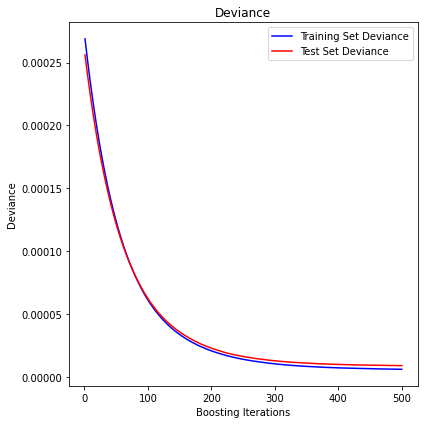

In [53]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

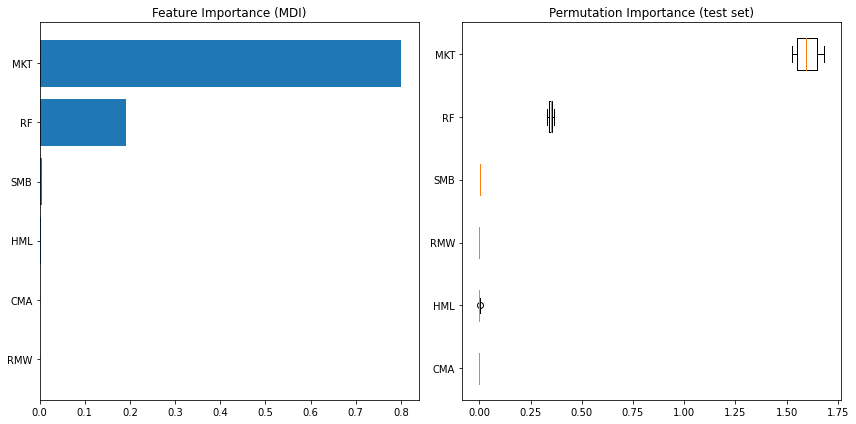

In [110]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df_stock_factor.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(df_stock_factor.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Catboost

#### https://catboost.ai/docs/concepts/python-usages-examples.html

In [111]:
from catboost import CatBoostRegressor


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(3674, 7)
(1225, 7)


In [112]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, Y_train)
# Get predictions
y_pred = model.predict(X_test)

0:	learn: 0.0101138	total: 2.73ms	remaining: 2.73s
1:	learn: 0.0078029	total: 5.17ms	remaining: 2.58s
2:	learn: 0.0067526	total: 6.2ms	remaining: 2.06s
3:	learn: 0.0060478	total: 7.16ms	remaining: 1.78s
4:	learn: 0.0057635	total: 8.16ms	remaining: 1.62s
5:	learn: 0.0055056	total: 9.12ms	remaining: 1.51s
6:	learn: 0.0052410	total: 10ms	remaining: 1.43s
7:	learn: 0.0050499	total: 11ms	remaining: 1.36s
8:	learn: 0.0047885	total: 11.9ms	remaining: 1.31s
9:	learn: 0.0045095	total: 12.8ms	remaining: 1.27s
10:	learn: 0.0042655	total: 13.8ms	remaining: 1.24s
11:	learn: 0.0040919	total: 14.7ms	remaining: 1.21s
12:	learn: 0.0040044	total: 15.6ms	remaining: 1.18s
13:	learn: 0.0038840	total: 16.4ms	remaining: 1.16s
14:	learn: 0.0038197	total: 17.3ms	remaining: 1.14s
15:	learn: 0.0037320	total: 18.2ms	remaining: 1.12s
16:	learn: 0.0036935	total: 19.1ms	remaining: 1.1s
17:	learn: 0.0036393	total: 20ms	remaining: 1.09s
18:	learn: 0.0036030	total: 20.9ms	remaining: 1.08s
19:	learn: 0.0035494	total: 21

206:	learn: 0.0020445	total: 189ms	remaining: 724ms
207:	learn: 0.0020433	total: 191ms	remaining: 725ms
208:	learn: 0.0020419	total: 192ms	remaining: 727ms
209:	learn: 0.0020400	total: 194ms	remaining: 728ms
210:	learn: 0.0020387	total: 195ms	remaining: 729ms
211:	learn: 0.0020360	total: 196ms	remaining: 729ms
212:	learn: 0.0020342	total: 197ms	remaining: 729ms
213:	learn: 0.0020336	total: 199ms	remaining: 730ms
214:	learn: 0.0020311	total: 200ms	remaining: 730ms
215:	learn: 0.0020285	total: 201ms	remaining: 730ms
216:	learn: 0.0020264	total: 202ms	remaining: 730ms
217:	learn: 0.0020245	total: 204ms	remaining: 730ms
218:	learn: 0.0020225	total: 205ms	remaining: 730ms
219:	learn: 0.0020202	total: 206ms	remaining: 730ms
220:	learn: 0.0020183	total: 207ms	remaining: 730ms
221:	learn: 0.0020171	total: 209ms	remaining: 731ms
222:	learn: 0.0020139	total: 210ms	remaining: 731ms
223:	learn: 0.0020114	total: 211ms	remaining: 731ms
224:	learn: 0.0020097	total: 212ms	remaining: 731ms
225:	learn: 

376:	learn: 0.0018283	total: 375ms	remaining: 619ms
377:	learn: 0.0018275	total: 377ms	remaining: 620ms
378:	learn: 0.0018257	total: 378ms	remaining: 619ms
379:	learn: 0.0018248	total: 379ms	remaining: 618ms
380:	learn: 0.0018235	total: 380ms	remaining: 617ms
381:	learn: 0.0018221	total: 381ms	remaining: 616ms
382:	learn: 0.0018217	total: 382ms	remaining: 615ms
383:	learn: 0.0018215	total: 383ms	remaining: 615ms
384:	learn: 0.0018201	total: 384ms	remaining: 614ms
385:	learn: 0.0018192	total: 386ms	remaining: 613ms
386:	learn: 0.0018181	total: 387ms	remaining: 612ms
387:	learn: 0.0018180	total: 388ms	remaining: 612ms
388:	learn: 0.0018171	total: 389ms	remaining: 611ms
389:	learn: 0.0018167	total: 390ms	remaining: 611ms
390:	learn: 0.0018154	total: 392ms	remaining: 610ms
391:	learn: 0.0018153	total: 393ms	remaining: 609ms
392:	learn: 0.0018149	total: 394ms	remaining: 609ms
393:	learn: 0.0018142	total: 395ms	remaining: 608ms
394:	learn: 0.0018135	total: 397ms	remaining: 607ms
395:	learn: 

579:	learn: 0.0016661	total: 558ms	remaining: 404ms
580:	learn: 0.0016656	total: 559ms	remaining: 403ms
581:	learn: 0.0016646	total: 564ms	remaining: 405ms
582:	learn: 0.0016645	total: 566ms	remaining: 405ms
583:	learn: 0.0016637	total: 567ms	remaining: 404ms
584:	learn: 0.0016632	total: 568ms	remaining: 403ms
585:	learn: 0.0016625	total: 570ms	remaining: 402ms
586:	learn: 0.0016614	total: 571ms	remaining: 402ms
587:	learn: 0.0016607	total: 573ms	remaining: 401ms
588:	learn: 0.0016599	total: 574ms	remaining: 401ms
589:	learn: 0.0016595	total: 576ms	remaining: 400ms
590:	learn: 0.0016582	total: 577ms	remaining: 399ms
591:	learn: 0.0016576	total: 578ms	remaining: 399ms
592:	learn: 0.0016566	total: 580ms	remaining: 398ms
593:	learn: 0.0016564	total: 582ms	remaining: 397ms
594:	learn: 0.0016559	total: 583ms	remaining: 397ms
595:	learn: 0.0016558	total: 584ms	remaining: 396ms
596:	learn: 0.0016555	total: 586ms	remaining: 395ms
597:	learn: 0.0016555	total: 587ms	remaining: 394ms
598:	learn: 

773:	learn: 0.0015621	total: 742ms	remaining: 217ms
774:	learn: 0.0015614	total: 745ms	remaining: 216ms
775:	learn: 0.0015608	total: 746ms	remaining: 215ms
776:	learn: 0.0015602	total: 747ms	remaining: 214ms
777:	learn: 0.0015597	total: 749ms	remaining: 214ms
778:	learn: 0.0015591	total: 750ms	remaining: 213ms
779:	learn: 0.0015586	total: 751ms	remaining: 212ms
780:	learn: 0.0015581	total: 752ms	remaining: 211ms
781:	learn: 0.0015580	total: 754ms	remaining: 210ms
782:	learn: 0.0015579	total: 755ms	remaining: 209ms
783:	learn: 0.0015574	total: 757ms	remaining: 208ms
784:	learn: 0.0015573	total: 758ms	remaining: 208ms
785:	learn: 0.0015569	total: 760ms	remaining: 207ms
786:	learn: 0.0015567	total: 761ms	remaining: 206ms
787:	learn: 0.0015564	total: 762ms	remaining: 205ms
788:	learn: 0.0015563	total: 765ms	remaining: 205ms
789:	learn: 0.0015557	total: 767ms	remaining: 204ms
790:	learn: 0.0015553	total: 768ms	remaining: 203ms
791:	learn: 0.0015547	total: 770ms	remaining: 202ms
792:	learn: 

953:	learn: 0.0014967	total: 926ms	remaining: 44.7ms
954:	learn: 0.0014960	total: 928ms	remaining: 43.7ms
955:	learn: 0.0014956	total: 929ms	remaining: 42.8ms
956:	learn: 0.0014956	total: 931ms	remaining: 41.8ms
957:	learn: 0.0014955	total: 932ms	remaining: 40.9ms
958:	learn: 0.0014948	total: 933ms	remaining: 39.9ms
959:	learn: 0.0014944	total: 935ms	remaining: 38.9ms
960:	learn: 0.0014937	total: 936ms	remaining: 38ms
961:	learn: 0.0014931	total: 937ms	remaining: 37ms
962:	learn: 0.0014930	total: 938ms	remaining: 36ms
963:	learn: 0.0014926	total: 942ms	remaining: 35.2ms
964:	learn: 0.0014925	total: 943ms	remaining: 34.2ms
965:	learn: 0.0014922	total: 944ms	remaining: 33.2ms
966:	learn: 0.0014918	total: 945ms	remaining: 32.3ms
967:	learn: 0.0014914	total: 947ms	remaining: 31.3ms
968:	learn: 0.0014910	total: 948ms	remaining: 30.3ms
969:	learn: 0.0014909	total: 950ms	remaining: 29.4ms
970:	learn: 0.0014904	total: 953ms	remaining: 28.5ms
971:	learn: 0.0014899	total: 955ms	remaining: 27.5ms

In [113]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare

Actual  Predicted
2313  0.000003  -0.001998
4686 -0.001363  -0.001489
1170 -0.014017  -0.014044
3561 -0.004796  -0.004714
4633  0.008552   0.009140
...        ...        ...
1671 -0.023606  -0.022044
1992 -0.011758  -0.009392
3189  0.004989   0.004981
1948  0.006816   0.010258
1585 -0.020050  -0.017407

[1225 rows x 2 columns]

In [114]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.001733826799968051
Mean Squared Error: 1.2702852274453907e-05
Root Mean Squared Error: 0.003564106097530474


# Lightgbm

#### https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [60]:
import lightgbm as lgb


# Split the data into train/test - default is 25% data for test
train_df,test_df = train_test_split(df_stock_factor)
print(train_df.shape)
print(test_df.shape)

# Drop the XS-Ret column from test data and 
X_train = train_df.drop("XsRet", axis=1)
X_test  = test_df.drop("XsRet", axis=1).copy()

Y_train = train_df["XsRet"]
Y_test = test_df['XsRet']

(3674, 7)
(1225, 7)


In [61]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

In [62]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.02,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('lgbm-model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 0.0115633	valid_0's l2: 0.000244857
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.0113597	valid_0's l2: 0.000236659
[3]	valid_0's l1: 0.01117	valid_0's l2: 0.000228978
[4]	valid_0's l1: 0.0109746	valid_0's l2: 0.000221394
[5]	valid_0's l1: 0.0107849	valid_0's l2: 0.000214095
[6]	valid_0's l1: 0.0106662	valid_0's l2: 0.000210029
[7]	valid_0's l1: 0.0104806	valid_0's l2: 0.000202935
[8]	valid_0's l1: 0.0103048	valid_0's l2: 0.000196319
[9]	valid_0's l1: 0.0101263	valid_0's l2: 0.000189763
[10]	valid_0's l1: 0.00997506	valid_0's l2: 0.000184024
[11]	valid_0's l1: 0.00982903	valid_0's l2: 0.000178632
[12]	valid_0's l1: 0.00966646	valid_0's l2: 0.000172942
[13]	valid_0's l1: 0.00949834	valid_0's l2: 0.000167326
[14]	valid_0's l1: 0.00933318	valid_0's l2: 0.000161929
[15]	valid_

In [66]:
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
compare[compare['Predicted'] > 0.0]

Actual  Predicted
3212  0.013740   0.000111
1862  0.020390   0.001479
2064  0.020545   0.001471
349   0.037580   0.004775
2371  0.016219   0.001597
...        ...        ...
3958  0.016189   0.000637
4080  0.016293   0.000587
2183  0.026392   0.004020
811   0.014078   0.001043
2013  0.045301   0.011691

[120 rows x 2 columns]

In [64]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.008518011032698863
Mean Squared Error: 0.00013667128456501404
Root Mean Squared Error: 0.011690649450095321
